## WeGo Data Introduction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wego = pd.read_csv("../data/Headway Data, 8-1-2023 to 9-30-2023.csv")

wego.head(100)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,6.500000,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,0.000000,NaN
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,0.0,0,12.866666,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,120230801,1,99457985,2023-08-01,22,2200,2689,345132,0,FROM DOWNTOWN,...,36.800000,6.800000,0,0,1,0,0.0,0,0.000000,NaN
96,120230801,1,99457986,2023-08-01,22,2200,2689,345132,0,FROM DOWNTOWN,...,NaN,NaN,0,0,1,0,NaN,0,0.000000,NaN
97,120230801,1,99457987,2023-08-01,22,2200,2689,345133,0,TO DOWNTOWN,...,60.533333,-7.466667,0,0,1,0,0.0,0,1.733333,7.0
98,120230801,1,99457988,2023-08-01,22,2200,2689,345133,0,TO DOWNTOWN,...,35.750000,2.750000,0,0,1,0,0.0,0,0.000000,NaN


In [3]:
wego.shape                                                                             

(350329, 30)

In [4]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES'],
      dtype='object')

In the data, the bus route can be identified by its ROUTE_ABBR value.  
**3:** West End  
**7:** Hillsboro  
**22:** Bordeaux  
**23:** Dickerson Pike  
**50:** Charlotte Pike  
**52:** Nolensville Pike  
**55:** Murfreesboro Pike  
**56:** Gallatin Pike

In [5]:
wego['ROUTE_ABBR'].value_counts().sort_index()

ROUTE_ABBR
3     47162
7     18026
22    25959
23    42108
50    43291
52    51819
55    61944
56    60020
Name: count, dtype: int64

The trip can be identified by the DATE/CALENDAR_ID plus the TRIP_ID.  
**Warning:** The TRIP_ID refers to the route and time but will be used across multiple days.

The data contains multiple **time points** for each trip. There are more stops along the route than time points, but the time points are the points with specific scheduled times the bus operators must adhere to.

The first stop of a trip has a TRIP_EDGE of 1, the last has a TRIP_EDGE of 2, and the intermediate stops are TRIP_EDGE 0. 

Here is the first trip in the dataset. It was a Bordeaux route (Route 22), scheduled to start at 4:42:00 and end at 5:10:00.

In [6]:
wego[['DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'SCHEDULED_TIME']].loc[:3]

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00


Note that the same TRIP_ID appears on the following day.

In [7]:
(
    wego
    .loc[wego['DATE'].astype(str).isin(['2023-08-01', '2023-08-02'])]
    .loc[wego['TRIP_ID'] == 345104]
    [['DATE', 'ROUTE_ABBR', 'TRIP_ID', 'TIME_POINT_ABBR', 'TRIP_EDGE', 'ROUTE_DIRECTION_NAME', 'SCHEDULED_TIME', 'ROUTE_STOP_SEQUENCE']]
)

,DATE,ROUTE_ABBR,TRIP_ID,TIME_POINT_ABBR,TRIP_EDGE,ROUTE_DIRECTION_NAME,SCHEDULED_TIME,ROUTE_STOP_SEQUENCE
0,2023-08-01,22,345104,MHSP,1,TO DOWNTOWN,2023-08-01 04:42:00,14.0
1,2023-08-01,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-01 04:46:00,10.0
2,2023-08-01,22,345104,CV23,0,TO DOWNTOWN,2023-08-01 04:54:00,5.0
3,2023-08-01,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-01 05:10:00,1.0
6461,2023-08-02,22,345104,MHSP,1,TO DOWNTOWN,2023-08-02 04:42:00,14.0
6462,2023-08-02,22,345104,ELIZ,0,TO DOWNTOWN,2023-08-02 04:46:00,10.0
6463,2023-08-02,22,345104,CV23,0,TO DOWNTOWN,2023-08-02 04:54:00,5.0
6464,2023-08-02,22,345104,MCC5_10,2,TO DOWNTOWN,2023-08-02 05:10:00,1.0


**Adherence** refers to the difference between scheduled time and the actual time that the bus departs from a stop.

A negative value for ADHERENCE indicates that the bus is late, and a positive indicates that the bus is early.

Generally, an adherence value less than -6 is considered late, and greater than 1 is considered early, but there are some exceptions. For example, a positive adherence for the end of a trip (TRIP_EDGE 2) is not considered early, since it is not a problem if a bus ends its trip early as long as it didn't pass other timepoints early along the way. You can check whether a trip was considered on-time, early, or late using the ADJUSTED_EARLY_COUNT, ADJUSTED_LATE_COUNT, and ADJUSTED_ONTIME_COUNT columns.

Here is an example of a trip where all time points would be considered to be on time. Notice that at the end of the trip, the bus was more than 6 minutes early, but was still counted as on-time since this was a trip edge of 2.

In [8]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[:3]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
0,2023-08-01,120230801,345104,22,MHSP,1,2023-08-01 04:42:00,2023-08-01 04:44:08,-2.133333,0,0,1
1,2023-08-01,120230801,345104,22,ELIZ,0,2023-08-01 04:46:00,2023-08-01 04:48:27,-2.450000,0,0,1
2,2023-08-01,120230801,345104,22,CV23,0,2023-08-01 04:54:00,2023-08-01 04:54:56,-0.933333,0,0,1
3,2023-08-01,120230801,345104,22,MCC5_10,2,2023-08-01 05:10:00,2023-08-01 05:03:43,6.283333,0,0,1


And one that has one late stop.

In [9]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[77:79]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
77,2023-08-01,120230801,345127,22,MHSP,1,2023-08-01 17:05:00,2023-08-01 17:08:21,-3.350000,0,0,1
78,2023-08-01,120230801,345127,22,CV23,0,2023-08-01 17:14:00,2023-08-01 17:20:10,-6.166666,0,1,0
79,2023-08-01,120230801,345127,22,MCC5_10,2,2023-08-01 17:30:00,2023-08-01 17:30:23,-0.383333,0,0,1


And one which was early.

In [10]:
(
    wego
    [[
        'DATE', 'CALENDAR_ID', 'TRIP_ID', 'ROUTE_ABBR',
        'TIME_POINT_ABBR', 'TRIP_EDGE',
        'SCHEDULED_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
        'ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT'
    ]]
    .loc[11:13]
)

,DATE,CALENDAR_ID,TRIP_ID,ROUTE_ABBR,TIME_POINT_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
11,2023-08-01,120230801,345107,22,MCC5_10,1,2023-08-01 06:15:00,2023-08-01 06:16:19,-1.316666,0,0,1
12,2023-08-01,120230801,345107,22,CV23,0,2023-08-01 06:25:00,2023-08-01 06:23:30,1.500000,1,0,0
13,2023-08-01,120230801,345107,22,MHSP,2,2023-08-01 06:35:00,2023-08-01 06:30:59,4.016666,0,0,1


**Headway** is the amount of time between a bus and the prior bus at the same stop. In the dataset, the amount of headway scheduled is contained in the SCHEDULED_HDWY column and indicates the difference between the scheduled time for a particular stop and the scheduled time for the previous bus on that same stop.

This dataset contains a column HDWY_DEV, which shows the amount of deviation from the scheduled headway. **Bunching** occurs when there is shorter headway than scheduled, which would appear as a negative HDWY_DEV value. **Gapping** is when there is more headway than scheduled and appears as a positive value in the HDWY_DEV column. Note that you can calculate headway deviation percentage as HDWY_DEV/SCHEDULED_HDWY. 

The generally accepted range of headway deviation is 50% to 150% of the scheduled headway, so if scheduled headway is 10 minutes, a headway deviation of up to 5 minutes would be acceptable (but not ideal).

In [11]:
(
    wego
    .loc[wego['ROUTE_ABBR'] == 22]
    .loc[wego['ROUTE_DIRECTION_NAME'] == 'TO DOWNTOWN']
    .loc[wego['TIME_POINT_ABBR'] == 'CV23']
    [['DATE', 'TRIP_ID', 'TIME_POINT_ABBR','ROUTE_DIRECTION_NAME', 'TRIP_EDGE', 
      'SCHEDULED_TIME', 'SCHEDULED_HDWY',
      'ACTUAL_DEPARTURE_TIME', 'ACTUAL_HDWY', 'HDWY_DEV'
     ]]
    .sort_values(['DATE', 'SCHEDULED_TIME'])
    .iloc[:5]
)

,DATE,TRIP_ID,TIME_POINT_ABBR,ROUTE_DIRECTION_NAME,TRIP_EDGE,SCHEDULED_TIME,SCHEDULED_HDWY,ACTUAL_DEPARTURE_TIME,ACTUAL_HDWY,HDWY_DEV
2,2023-08-01,345104,CV23,TO DOWNTOWN,0,2023-08-01 04:54:00,NaN,2023-08-01 04:54:56,NaN,NaN
126,2023-08-01,345213,CV23,TO DOWNTOWN,0,2023-08-01 05:19:00,25.0,2023-08-01 05:18:59,24.050000,-0.950000
402,2023-08-01,345405,CV23,TO DOWNTOWN,0,2023-08-01 05:39:00,20.0,2023-08-01 05:39:40,20.683333,0.683333
9,2023-08-01,345106,CV23,TO DOWNTOWN,0,2023-08-01 05:54:00,15.0,2023-08-01 05:54:11,14.516666,-0.483334
316,2023-08-01,345377,CV23,TO DOWNTOWN,0,2023-08-01 06:09:00,15.0,2023-08-01 06:10:01,15.833333,0.833333


Two other columns that you've been asked to explore are the DWELL_IN_MINS column and SCHEDULED_LAYOVER_MINUTES, which shows the difference between actual arrival and actual departure time at a time point and the time a bus was scheduled to arrive at the time point and when it is scheduled to leave at the beginning of a trip.

Here, we can see the end of the first trip in the dataset and the beginning of the next trip, which goes in the opposite direction.

In [12]:
wego.loc[3:4, ['DATE', 'TRIP_ID', 'TRIP_EDGE', 'TIME_POINT_ABBR',
               'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'DWELL_IN_MINS', 'SCHEDULED_LAYOVER_MINUTES']]

,DATE,TRIP_ID,TRIP_EDGE,TIME_POINT_ABBR,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
3,2023-08-01,345104,2,MCC5_10,2023-08-01 05:03:43,2023-08-01 05:03:43,0.000000,NaN
4,2023-08-01,345105,1,MCC5_10,2023-08-01 05:03:43,2023-08-01 05:16:35,12.866666,5.0


In [13]:
# creat a new column called 'DATE_TRIP by combining 'CALENDAR_ID' AND 'TRIP_ID' to get a unique id.
wego['DATE_TRIP'] = wego.apply(lambda row: str(row['CALENDAR_ID']) + '-' + str(row['TRIP_ID']), axis=1)

In [14]:
wego['DATE_TRIP']

0         120230801-345104
1         120230801-345104
2         120230801-345104
3         120230801-345104
4         120230801-345105
                ...       
350324    120230930-353448
350325    120230930-353448
350326    120230930-353449
350327    120230930-353449
350328    120230930-353449
Name: DATE_TRIP, Length: 350329, dtype: object

In [15]:
wego['DATE_TRIP'].nunique()

67370

# Q1
What is the overall on-time performance, and what do the overall distributions of adherence and headway deviation look like?


In [16]:
#to get number of trips (count number of rows)
wego.shape[0]

350329

In [17]:
total_trips = len(wego)

In [18]:
total_trips

350329

In [19]:
on_time_performance = wego['ADJUSTED_ONTIME_COUNT'].sum()/total_trips*100

In [20]:
on_time_performance

77.08411236295025

77% of the trip is on time

In [21]:
#[1]represent on time trips on the dataframe
round(wego['ADJUSTED_ONTIME_COUNT'].value_counts()[1]/wego.shape[0]*100,2)

77.08

 distributions of adherence and headway deviation

In [22]:
wego.head(1)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,DATE_TRIP
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,NaN,0,0,1,0,0.0,0,6.5,NaN,120230801-345104


In [23]:
trip_adherence_count = (wego.groupby('DATE_TRIP')[['ADJUSTED_LATE_COUNT','ADJUSTED_EARLY_COUNT','ADJUSTED_ONTIME_COUNT']]).sum()

In [24]:
trip_adherence_count

,ADJUSTED_LATE_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_ONTIME_COUNT
DATE_TRIP,,,
120230801-345104,0,0,4
120230801-345105,0,0,3
120230801-345106,0,0,4
120230801-345107,0,1,2
120230801-345108,0,0,4
...,...,...,...
120230930-353445,0,0,3
120230930-353446,1,0,1
120230930-353447,1,0,1


In [25]:
perfect_trips = (trip_adherence_count[(trip_adherence_count['ADJUSTED_LATE_COUNT']==0)&(trip_adherence_count['ADJUSTED_EARLY_COUNT']==0)])

In [26]:
perfect_trips

,ADJUSTED_LATE_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_ONTIME_COUNT
DATE_TRIP,,,
120230801-345104,0,0,4
120230801-345105,0,0,3
120230801-345106,0,0,4
120230801-345108,0,0,4
120230801-345109,0,0,4
...,...,...,...
120230930-353434,0,0,3
120230930-353435,0,0,3
120230930-353436,0,0,3


In [27]:
wego['ADHERENCE'].apply(['min','max','mean'])

min    -948.533333
max      88.383333
mean     -3.188796
Name: ADHERENCE, dtype: float64

In [28]:
wego['HDWY_DEV'].agg(['min','max','mean'])

min     -64.000000
max     565.433333
mean      0.518081
Name: HDWY_DEV, dtype: float64

In [29]:
wego['ADHERENCE'].std()

6.89884228017274

In [30]:
wego.describe()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_STOP_SEQUENCE,TRIP_EDGE,...,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES
count,3.503290e+05,350329.000000,3.503290e+05,350329.000000,350329.000000,350329.000000,350329.000000,350329.000000,350318.000000,350329.000000,...,266062.000000,265893.000000,350329.000000,350329.000000,350329.000000,350329.000000,280000.000000,350329.000000,338858.000000,53102.000000
mean,1.202309e+08,1.298465,1.001038e+08,38.348033,3846.948617,1951.130514,351609.792895,0.006631,7.351284,0.579090,...,18.648561,0.518081,0.027902,0.168522,0.770841,0.015263,0.015193,0.011954,2.963915,12.628168
std,5.063417e+01,0.633101,3.227503e+05,20.338342,2042.237357,769.827675,1490.949102,0.097167,4.033002,0.793977,...,14.330568,7.161798,0.164693,0.374329,0.420292,0.122596,0.122320,0.108681,7.402934,6.393862
min,1.202308e+08,1.000000,9.945789e+07,3.000000,300.000000,0.000000,345104.000000,0.000000,1.000000,0.000000,...,0.000000,-64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-208.033333,0.000000
25%,1.202308e+08,1.000000,9.989140e+07,22.000000,2211.000000,1391.000000,350900.000000,0.000000,4.000000,0.000000,...,11.000000,-2.316667,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000
50%,1.202308e+08,1.000000,1.001346e+08,50.000000,5006.000000,2012.000000,352001.000000,0.000000,6.000000,0.000000,...,16.183333,0.033333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,10.000000
75%,1.202309e+08,1.000000,1.003481e+08,55.000000,5505.000000,2585.000000,352669.000000,0.000000,10.000000,1.000000,...,23.250000,2.483333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.950000,16.000000
max,1.202309e+08,3.000000,1.007029e+08,56.000000,9975.000000,3173.000000,354106.000000,4.000000,17.000000,2.000000,...,590.433333,565.433333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,956.500000,118.000000


In [31]:
adherence_mean = wego['ADHERENCE'].mean()
adherence_std = wego['ADHERENCE'].std()

[Text(0.5, 1.0, 'Adherence Distribution Excluding Outliers'),
 Text(0.5, 0, 'Adherence')]

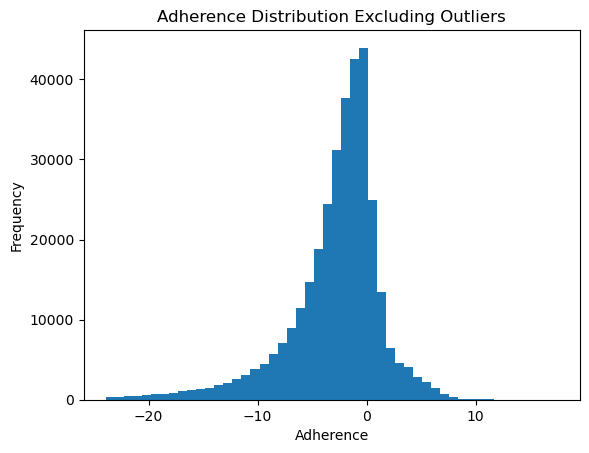

In [32]:
ax = (wego[wego['ADHERENCE'].between(adherence_mean - adherence_std*3,
                                   adherence_mean + adherence_std*3,
                                   inclusive='both')] ['ADHERENCE']
      .plot(kind='hist',  bins=50))

ax.set(title='Adherence Distribution Excluding Outliers',
       xlabel='Adherence')

In [33]:
hdwy_mean = wego['HDWY_DEV'].mean()
hdwy_std = wego['HDWY_DEV'].std()

[Text(0.5, 1.0, 'Headway Deviation Distribution Excluding Outliers'),
 Text(0.5, 0, 'Headway Deviation')]

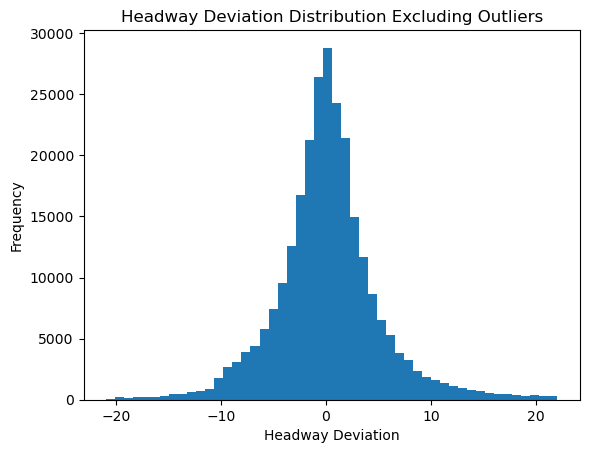

In [34]:
hdwy_mean = wego['HDWY_DEV'].mean()
hdwy_std = wego['HDWY_DEV'].std()
ax= (wego[wego['HDWY_DEV'].between(hdwy_mean - hdwy_std*3, 
                                  hdwy_mean + hdwy_std*3, 
                                  inclusive='both')]['HDWY_DEV']
     .plot(kind='hist', bins=50))

ax.set(title='Headway Deviation Distribution Excluding Outliers',
    xlabel='Headway Deviation')

# Q2 
How does direction of travel, route, or location affect the headway and on-time performance?

In [35]:
#create HDWY_DEV PERCENTAGE COLUMN 
wego['HDWY_DEV_PCT'] = wego['HDWY_DEV']/wego['SCHEDULED_HDWY']*100

#creat a function to show bunching, gapping and acceptable

In [36]:
# # Create Bunching or Gapping Indicator
# def is_hdwy_bunching(dev, pct):
#     if (dev < 0) & (pct > 50):
#         return int(1)
#     else:
#         return int(0)
# def is_hdwy_gapping(dev, pct):
#     if (dev > 0) & (pct > 50):
#         return int(1)
#     else:
#         return int(0)
# def is_hdwy_acceptable(pct):
#     if pct <= 50:
#         return int(1)
#     else:
#         return int(0)

In [37]:
def gapping(percentage):
    if (percentage < 0) & (abs(percentage) > 50):
        return int(1)
    else:
        return int(0)
    
def acceptable(percentage):
    if abs(percentage) <= 50:
        return int(1)
    else:
        return int(0)
    
def bunching(percentage):
    if (percentage > 0) & (abs(percentage) > 50):
        return int(1)
    else:
        return int(0)

In [38]:
# print(wego.HDWY_GAPPING.sum())
# print(wego.HDWY_ACCEPTABLE.sum())
# print(wego.HDWY_BUNCHING.sum())

#creat columns from the above function

In [39]:
wego['HDWY_BUNCHING']= wego['HDWY_DEV_PCT'].apply(bunching)
wego['HDWY_GAPPING']= wego['HDWY_DEV_PCT'].apply(gapping)
wego['HDWY_ACCEPTABLE']= wego['HDWY_DEV_PCT'].apply(acceptable)

In [40]:
wego.head(50)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,DATE_TRIP,HDWY_DEV_PCT,HDWY_BUNCHING,HDWY_GAPPING,HDWY_ACCEPTABLE
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0.0,0,6.500000,NaN,120230801-345104,NaN,0,0,0
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0.0,0,0.000000,NaN,120230801-345104,NaN,0,0,0
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,0.0,0,0.000000,NaN,120230801-345104,NaN,0,0,0
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0,NaN,0,0.000000,NaN,120230801-345104,NaN,0,0,0
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,0,0.0,0,12.866666,5.0,120230801-345105,NaN,0,0,0
5,120230801,1,99457895,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,0,0.0,0,0.000000,NaN,120230801-345105,NaN,0,0,0
6,120230801,1,99457896,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,0,NaN,0,0.000000,NaN,120230801-345105,NaN,0,0,0
7,120230801,1,99457897,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,0,0.0,0,13.216666,10.0,120230801-345106,7.619046,0,0,1
8,120230801,1,99457898,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,0,0.0,0,0.000000,NaN,120230801-345106,5.619046,0,0,1
9,120230801,1,99457899,2023-08-01,22,2200,1040,345106,0,TO DOWNTOWN,...,0,0.0,0,0.000000,NaN,120230801-345106,-3.222227,0,0,1


In [41]:
wego[wego['ROUTE_DIRECTION_NAME']=='FROM DOWNTOWN']['ADHERENCE'].apply(['min','max','mean','median'])

min      -948.533333
max        76.766666
mean       -3.960287
median     -2.516666
Name: ADHERENCE, dtype: float64

In [42]:
wego[wego['ROUTE_DIRECTION_NAME']=='TO DOWNTOWN']['ADHERENCE'].apply(['min','max','mean','median'])

min      -618.166666
max        88.383333
mean       -2.321804
median     -1.500000
Name: ADHERENCE, dtype: float64

In [43]:
wego.groupby('ROUTE_DIRECTION_NAME')[['HDWY_DEV','ADHERENCE']].describe()

HDWY_DEV                                                 \
                         count      mean       std        min   25%       50%   
ROUTE_DIRECTION_NAME                                                            
FROM DOWNTOWN         141392.0  0.579990  7.773842 -55.533334 -2.65  0.033333   
TO DOWNTOWN           124501.0  0.447773  6.395390 -64.000000 -2.00  0.033333   

                                       ADHERENCE                      \
                       75%         max     count      mean       std   
ROUTE_DIRECTION_NAME                                                   
FROM DOWNTOWN         2.85  565.433333  179306.0 -3.960287  7.234279   
TO DOWNTOWN           2.15  543.833333  159555.0 -2.321804  6.391098   

                                                                           
                             min       25%       50%       75%        max  
ROUTE_DIRECTION_NAME                                                       
FROM DOWNTOWN        -948.533333 -5.466666 -2.516666 -0.633333  76.766666  
TO DOWNTOWN          -618.166666 -3.666666 -1.500000 -0.100000  88.383333

#to downtown seems a better performance 

In [44]:
# #make sure to create columns if you use htis function
# # Calculate HDWY Deviation Percentage
# def get_dev_pct(row):
#     '''Takes a row as input, returns a perfencate value. 
# #     Calculate the headway deviation percentage taking into
# #     consideration the possibility of SCHEDULED_HDWY being 0'''
#     if row['SCHEDULED_HDWY'] != 0:
#         return abs(row['HDWY_DEV']) / row['SCHEDULED_HDWY'] * 100
#     else:
#         return np.NaN

# # create headway deviation percentable column
# wego.loc[:, 'HDWY_DEV_PCT'] = wego.apply(lambda r: get_dev_pct(r), axis=1)

C:\Users\zenas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


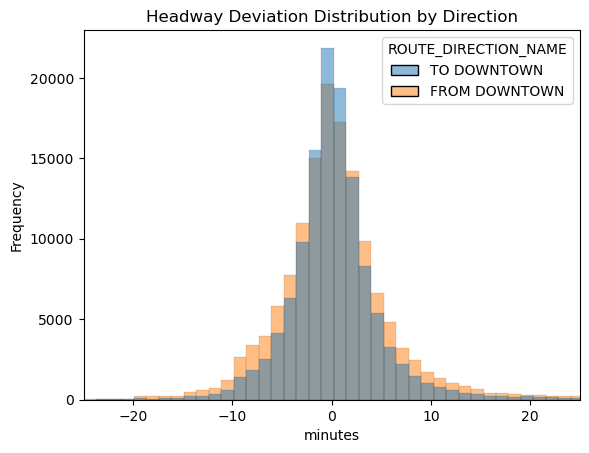

In [45]:

sns.histplot(data=wego, x='HDWY_DEV', hue='ROUTE_DIRECTION_NAME', bins=500)
plt.title('Headway Deviation Distribution by Direction')
plt.xlabel('minutes')
plt.ylabel('Frequency')
plt.xlim(-25,25)
#plt.ylim(0,65000)
plt.show()

C:\Users\zenas\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


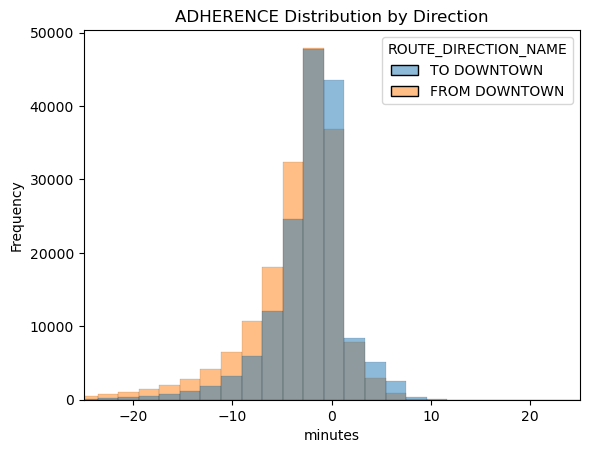

In [46]:
sns.histplot(data=wego, x='ADHERENCE', hue='ROUTE_DIRECTION_NAME', bins=500) 
plt.title('ADHERENCE Distribution by Direction')
plt.xlabel('minutes')
plt.ylabel('Frequency')
plt.xlim(-25,25)
#plt.ylim(0,65000)
plt.show()

In [47]:
wego['HDWY_DEV'].min()

-64.0

In [48]:
wego['HDWY_DEV'].max()

565.433333

In [49]:
wego.groupby('ROUTE_ABBR')[['HDWY_DEV','ADHERENCE']].describe()

HDWY_DEV                                                      \
              count      mean        std        min       25%       50%   
ROUTE_ABBR                                                                
3           36583.0  0.580907   6.203530 -64.000000 -2.450000  0.116666   
7           11578.0  0.336808   5.909983 -30.433334 -1.983334  0.033333   
22          17007.0  0.955867  10.248444 -43.650000 -1.966667  0.050000   
23          28478.0  1.053563   9.881327 -32.116667 -1.733334  0.066666   
50          34593.0  0.212376   4.760558 -33.250000 -2.083334  0.033333   
52          39887.0  0.974776   9.185015 -55.533334 -2.450000  0.083333   
55          49432.0  0.261038   6.364978 -29.933334 -3.150000 -0.033334   
56          48335.0  0.149213   4.714435 -27.266667 -2.333334  0.000000   

                                 ADHERENCE                                  \
                 75%         max     count      mean       std         min   
ROUTE_ABBR                                                                   
3           2.800000   76.866666   45488.0 -3.761491  5.415910 -133.250000   
7           2.133333   50.250000   17267.0 -3.346555  6.669753  -87.716666   
22          2.200000  508.700000   25188.0 -1.138107  6.391798 -675.000000   
23          2.066666  565.433333   39653.0 -1.760110  7.680491 -618.166666   
50          2.183333   54.283333   42629.0 -2.505022  6.159666 -489.316666   
52          2.783333  472.366666   49327.0 -3.971342  8.721732 -948.533333   
55          2.983333  102.000000   60359.0 -4.823302  7.535092 -375.233333   
56          2.383333  166.000000   58950.0 -2.703988  4.931009 -322.783333   

                                                     
                 25%       50%       75%        max  
ROUTE_ABBR                                           
3          -5.350000 -2.566666 -0.766666  33.750000  
7          -4.916666 -2.116666 -0.616666  88.383333  
22         -2.950000 -0.933333  0.816666  24.733333  
23         -3.116666 -1.316666  0.033333  33.633333  
50         -3.883333 -1.800000 -0.300000  22.350000  
52         -5.016666 -2.066666 -0.400000  30.200000  
55         -6.583333 -2.883333 -0.850000  40.250000  
56         -4.300000 -1.900000 -0.283333  39.916666

#Redo Q2
#Adherence by Direction

In [50]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES', 'DATE_TRIP', 'HDWY_DEV_PCT',
       'HDWY_BUNCHING', 'HDWY_GAPPING', 'HDWY_ACCEPTABLE'],
      dtype='object')

In [51]:
wego[wego['ROUTE_DIRECTION_NAME']=='TO DOWNTOWN']['HDWY_DEV_PCT'].mean()

inf

In [52]:
wego[wego['ROUTE_DIRECTION_NAME']=='FROM DOWNTOWN']['HDWY_DEV_PCT'].mean()

3.688614369671261

#Adherence by direction

In [53]:
direction_adher = wego.groupby('ROUTE_DIRECTION_NAME')[['ADJUSTED_EARLY_COUNT','ADJUSTED_LATE_COUNT','ADJUSTED_ONTIME_COUNT']].sum()

In [54]:
direction_adher

,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT
ROUTE_DIRECTION_NAME,,,
FROM DOWNTOWN,5291,39601,134414
TO DOWNTOWN,4484,19437,135634


In [55]:
routes_adher = wego.groupby('ROUTE_DIRECTION_NAME')[['ADJUSTED_ONTIME_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_EARLY_COUNT']].sum()


In [56]:
routes_adher

,ADJUSTED_ONTIME_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_EARLY_COUNT
ROUTE_DIRECTION_NAME,,,
FROM DOWNTOWN,134414,39601,5291
TO DOWNTOWN,135634,19437,4484


In [57]:

direction_adher['TOTALS'] = direction_adher.sum(axis=1)

In [58]:
direction_adher['ONTIME_PCT'] =direction_adher['ADJUSTED_ONTIME_COUNT'] / direction_adher['TOTALS'] * 100
direction_adher['EARLY_PCT'] =direction_adher['ADJUSTED_EARLY_COUNT'] / direction_adher['TOTALS'] * 100
direction_adher['LATE_PCT'] = direction_adher['ADJUSTED_LATE_COUNT'] / direction_adher['TOTALS'] * 100

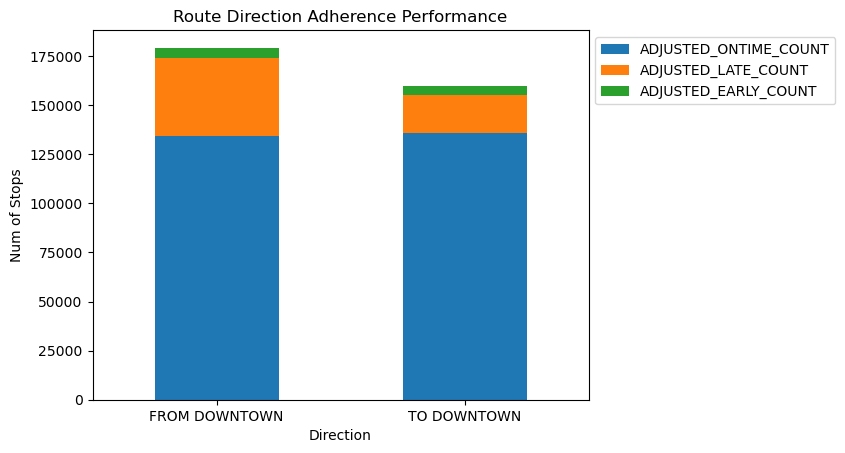

In [59]:
ax = (
    wego.groupby('ROUTE_DIRECTION_NAME')
         [['ADJUSTED_ONTIME_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_EARLY_COUNT']]
         .sum()
).plot(kind='bar', stacked=True)
ax.set(title = 'Route Direction Adherence Performance',
        xlabel = 'Direction',
        ylabel = 'Num of Stops')
ax.tick_params(axis='x', rotation=0)
ax.legend(bbox_to_anchor=(1, 1))


#dherence by Route

In [60]:
route_adher = wego.groupby('ROUTE_ABBR')[['ADJUSTED_ONTIME_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_EARLY_COUNT']].sum()
         

In [61]:
route_adher

,ADJUSTED_ONTIME_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_EARLY_COUNT
ROUTE_ABBR,,,
3,34516,9590,1382
7,13417,3417,433
22,22492,2065,631
23,35137,3230,1286
50,36309,5113,1207
52,37736,10038,1553
55,42080,16748,1531
56,48361,8837,1752


In [62]:
route_adher['TOTALS'] = route_adher.sum(axis=1)

In [63]:
route_adher['ONTIME_PCT'] =route_adher['ADJUSTED_ONTIME_COUNT'] / route_adher['TOTALS'] * 100
route_adher['EARLY_PCT'] = route_adher['ADJUSTED_EARLY_COUNT'] / route_adher['TOTALS'] * 100
route_adher['LATE_PCT'] = route_adher['ADJUSTED_LATE_COUNT'] / route_adher['TOTALS'] * 100

In [64]:
#with out creating a total column and percentage 

# ax = (wego.groupby('ROUTE_ABBR')[['ADJUSTED_ONTIME_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_EARLY_COUNT']].sum()
    
# ).plot(kind='bar', stacked=True)
# ax.set(title = 'Route Adherence Performance',
#         xlabel = 'Route',
#         ylabel = 'Num of Stops')
# ax.tick_params(axis='x', rotation=0)
# ax.legend(bbox_to_anchor=(1, 1))

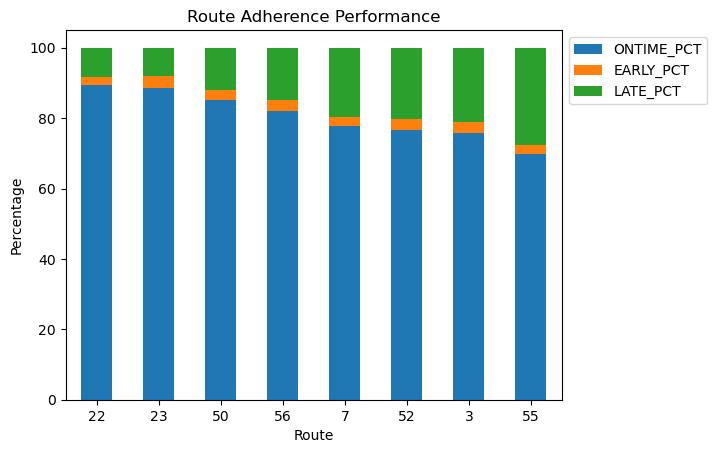

In [65]:

ax = (
   route_adher[['ONTIME_PCT', 'EARLY_PCT', 'LATE_PCT']]
).sort_values('ONTIME_PCT', ascending=False).plot(kind='bar', stacked=True)
ax.set(title = 'Route Adherence Performance',
        xlabel = 'Route',
       ylabel = 'Percentage')
ax.legend(bbox_to_anchor=(1, 1))
ax.tick_params(axis='x', rotation=0)

#
Headway by Direction

In [66]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES', 'DATE_TRIP', 'HDWY_DEV_PCT',
       'HDWY_BUNCHING', 'HDWY_GAPPING', 'HDWY_ACCEPTABLE'],
      dtype='object')

In [67]:
wego['HDWY_ACCEPTABLE'].value_counts()

HDWY_ACCEPTABLE
1    225918
0    124411
Name: count, dtype: int64

In [68]:
wego['HDWY_BUNCHING'].value_counts()

HDWY_BUNCHING
0    328356
1     21973
Name: count, dtype: int64

In [69]:
wego['HDWY_GAPPING'].value_counts()

HDWY_GAPPING
0    332330
1     17999
Name: count, dtype: int64

In [70]:
routes_totals = wego.groupby('ROUTE_DIRECTION_NAME')[['HDWY_BUNCHING','HDWY_GAPPING','HDWY_ACCEPTABLE']].sum()


In [71]:
routes_totals['TOTALS'] = routes_totals.sum(axis=1)

In [72]:
routes_totals['BUNCHING_PCT'] = (routes_totals['HDWY_BUNCHING'] / routes_totals['TOTALS']) * 100
routes_totals['GAPPING_PCT'] = (routes_totals['HDWY_GAPPING'] / routes_totals['TOTALS']) * 100
routes_totals['ACCEPTABLE_PCT'] = (routes_totals['HDWY_ACCEPTABLE'] / routes_totals['TOTALS']) * 100

In [73]:
routes_totals

,HDWY_BUNCHING,HDWY_GAPPING,HDWY_ACCEPTABLE,TOTALS,BUNCHING_PCT,GAPPING_PCT,ACCEPTABLE_PCT
ROUTE_DIRECTION_NAME,,,,,,,
FROM DOWNTOWN,13715,11755,115922,141392,9.699983,8.313766,81.986251
TO DOWNTOWN,8258,6244,109996,124498,6.633038,5.015342,88.351620


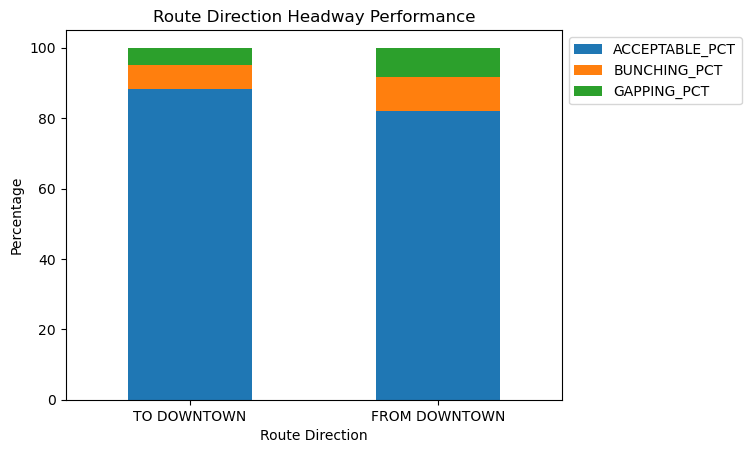

In [74]:
ax = (
    routes_totals[['ACCEPTABLE_PCT', 'BUNCHING_PCT', 'GAPPING_PCT']]
).sort_values('ACCEPTABLE_PCT', ascending=False).plot(kind='bar', stacked=True)
ax.set(title = 'Route Direction Headway Performance',
        xlabel = 'Route Direction',
       ylabel = 'Percentage')
ax.legend(bbox_to_anchor=(1, 1))
ax.tick_params(axis='x', rotation=0)

#Headway By Route

In [75]:
routes_number_totals = wego.groupby('ROUTE_ABBR')[['HDWY_BUNCHING','HDWY_GAPPING','HDWY_ACCEPTABLE']].sum()


In [76]:
routes_number_totals

,HDWY_BUNCHING,HDWY_GAPPING,HDWY_ACCEPTABLE
ROUTE_ABBR,,,
3,2944,2179,31460
7,615,463,10500
22,739,297,15971
23,1946,730,25802
50,1408,1056,32129
52,3828,3009,33050
55,6484,6569,36379
56,4009,3696,40627


In [77]:
routes_number_totals['TOTALS'] = routes_number_totals.sum(axis=1)

In [78]:
routes_number_totals['BUNCHING_PCT'] = (routes_number_totals['HDWY_BUNCHING'] / routes_number_totals['TOTALS']) * 100
routes_number_totals['GAPPING_PCT'] = (routes_number_totals['HDWY_GAPPING'] / routes_number_totals['TOTALS']) * 100
routes_number_totals['ACCEPTABLE_PCT'] = (routes_number_totals['HDWY_ACCEPTABLE'] / routes_number_totals['TOTALS']) * 100

In [79]:
routes_number_totals

,HDWY_BUNCHING,HDWY_GAPPING,HDWY_ACCEPTABLE,TOTALS,BUNCHING_PCT,GAPPING_PCT,ACCEPTABLE_PCT
ROUTE_ABBR,,,,,,,
3,2944,2179,31460,36583,8.047454,5.956319,85.996228
7,615,463,10500,11578,5.311798,3.998964,90.689238
22,739,297,15971,17007,4.345270,1.746340,93.908391
23,1946,730,25802,28478,6.833345,2.563382,90.603273
50,1408,1056,32129,34593,4.070188,3.052641,92.877172
52,3828,3009,33050,39887,9.597112,7.543811,82.859077
55,6484,6569,36379,49432,13.117009,13.288963,73.594028
56,4009,3696,40627,48332,8.294712,7.647108,84.058181


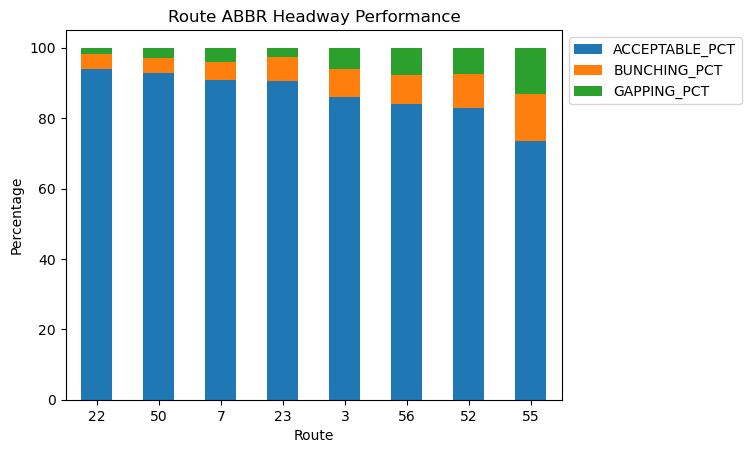

In [80]:
ax = (
    routes_number_totals[['ACCEPTABLE_PCT', 'BUNCHING_PCT', 'GAPPING_PCT']]
).sort_values('ACCEPTABLE_PCT', ascending=False).plot(kind='bar', stacked=True)
ax.set(title = 'Route ABBR Headway Performance',
        xlabel = 'Route',
       ylabel = 'Percentage')
ax.legend(bbox_to_anchor=(1, 1))
ax.tick_params(axis='x', rotation=0)

In [81]:
#count 
wego[['HDWY_BUNCHING','HDWY_GAPPING','HDWY_ACCEPTABLE']].sum()

HDWY_BUNCHING       21973
HDWY_GAPPING        17999
HDWY_ACCEPTABLE    225918
dtype: int64

#Adherence by location 

In [82]:
# TIME_POINT_ABBR column shows STOPS OR LOCATION
wego.groupby('TIME_POINT_ABBR')[['ADHERENCE', 'HDWY_DEV']].mean().sort_values('ADHERENCE', ascending=True)

,ADHERENCE,HDWY_DEV
TIME_POINT_ABBR,,
MCC5_11,-37.570714,NaN
MCC4_20,-13.356229,NaN
MCC5_12,-9.785042,NaN
MCC5_7,-9.075463,NaN
DCSCC,-7.091481,12.054055
...,...,...
HEAD,1.013657,NaN
MCC5_2,1.252623,NaN
25ACLARK,1.458553,0.551163


In [83]:
# Create new df for Adherence columns grouped by Location
location_totals=wego.groupby('TIME_POINT_ABBR')[['ADJUSTED_ONTIME_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_EARLY_COUNT']].sum()


In [84]:
# Create new total column for each row
location_totals['TOTALS'] = location_totals.sum(axis=1)

In [85]:
# Create new percentage column for each category
location_totals['ONTIME_PCT'] = location_totals['ADJUSTED_ONTIME_COUNT'] / location_totals['TOTALS'] * 100
location_totals['EARLY_PCT'] = location_totals['ADJUSTED_EARLY_COUNT'] / location_totals['TOTALS'] * 100
location_totals['LATE_PCT'] = location_totals['ADJUSTED_LATE_COUNT'] / location_totals['TOTALS'] * 100

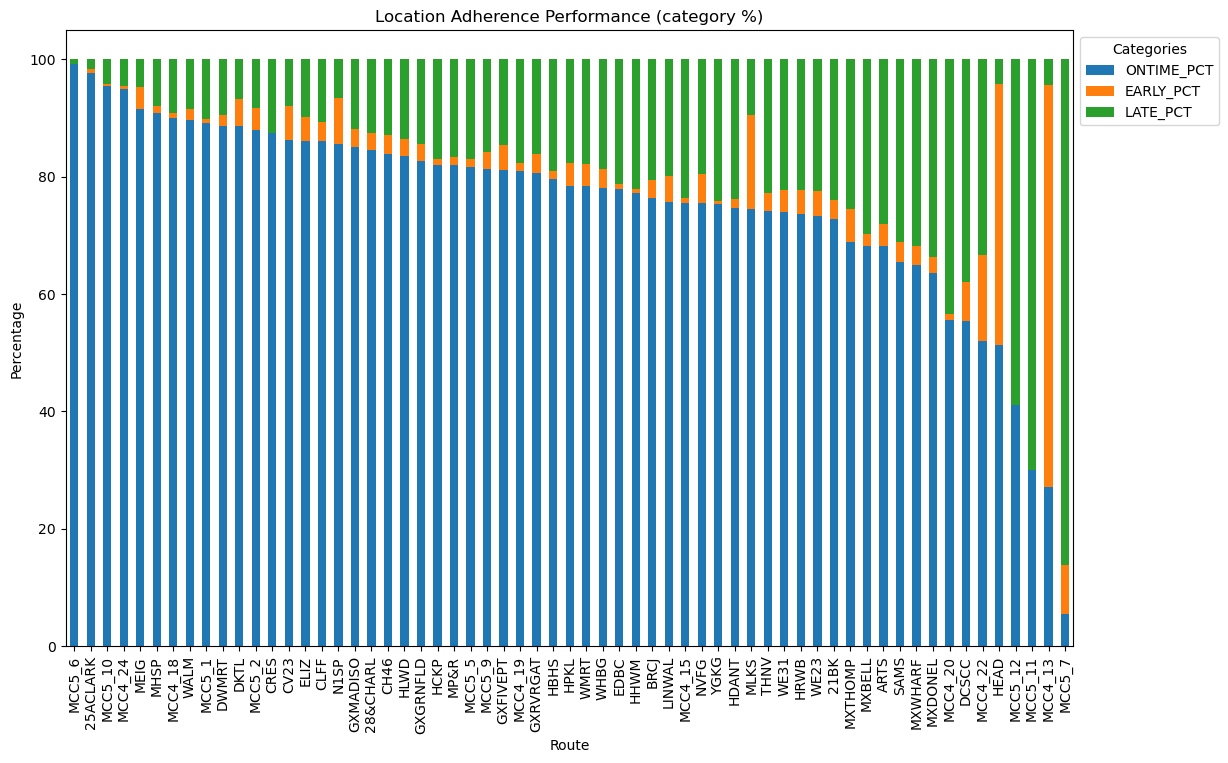

In [86]:
# Location Adherence graph
ax = (location_totals[['ONTIME_PCT', 'EARLY_PCT', 'LATE_PCT']]
).sort_values('ONTIME_PCT', ascending=False).plot(kind='bar', stacked=True, figsize=(13, 8))
ax.set(title = 'Location Adherence Performance (category %)',
        xlabel = 'Route',
       ylabel = 'Percentage')
ax.legend(bbox_to_anchor=(1, 1), title='Categories')
# ax.tick_params(axis='x', rotation=0)

#Headwya by location 

In [87]:
# Create new df for Headway columns grouped by Location
hdwy_location_totals = wego.groupby('TIME_POINT_ABBR')[['HDWY_BUNCHING', 'HDWY_ACCEPTABLE', 'HDWY_GAPPING']].sum()

In [88]:
hdwy_location_totals

,HDWY_BUNCHING,HDWY_ACCEPTABLE,HDWY_GAPPING
TIME_POINT_ABBR,,,
21BK,367,5119,287
25ACLARK,28,1100,4
28&CHARL,285,6407,222
ARTS,16,0,0
BRCJ,238,3553,96
...,...,...,...
WE23,787,6755,627
WE31,798,6745,632
WHBG,389,8355,278


In [89]:
# Create new total column for each row
hdwy_location_totals['TOTALS'] = hdwy_location_totals.sum(axis=1)

In [90]:
# Create new percentage column for each category
# the .loc[:, avoids common mistakes or problems
hdwy_location_totals.loc[:, 'BUNCHING_PCT'] = hdwy_location_totals['HDWY_BUNCHING'] / hdwy_location_totals['TOTALS'] * 100
hdwy_location_totals.loc[:, 'ACCEPTABLE_PCT'] = hdwy_location_totals['HDWY_ACCEPTABLE'] / hdwy_location_totals['TOTALS'] * 100
hdwy_location_totals.loc[:, 'GAPPING_PCT'] = hdwy_location_totals['HDWY_GAPPING'] / hdwy_location_totals['TOTALS'] * 100

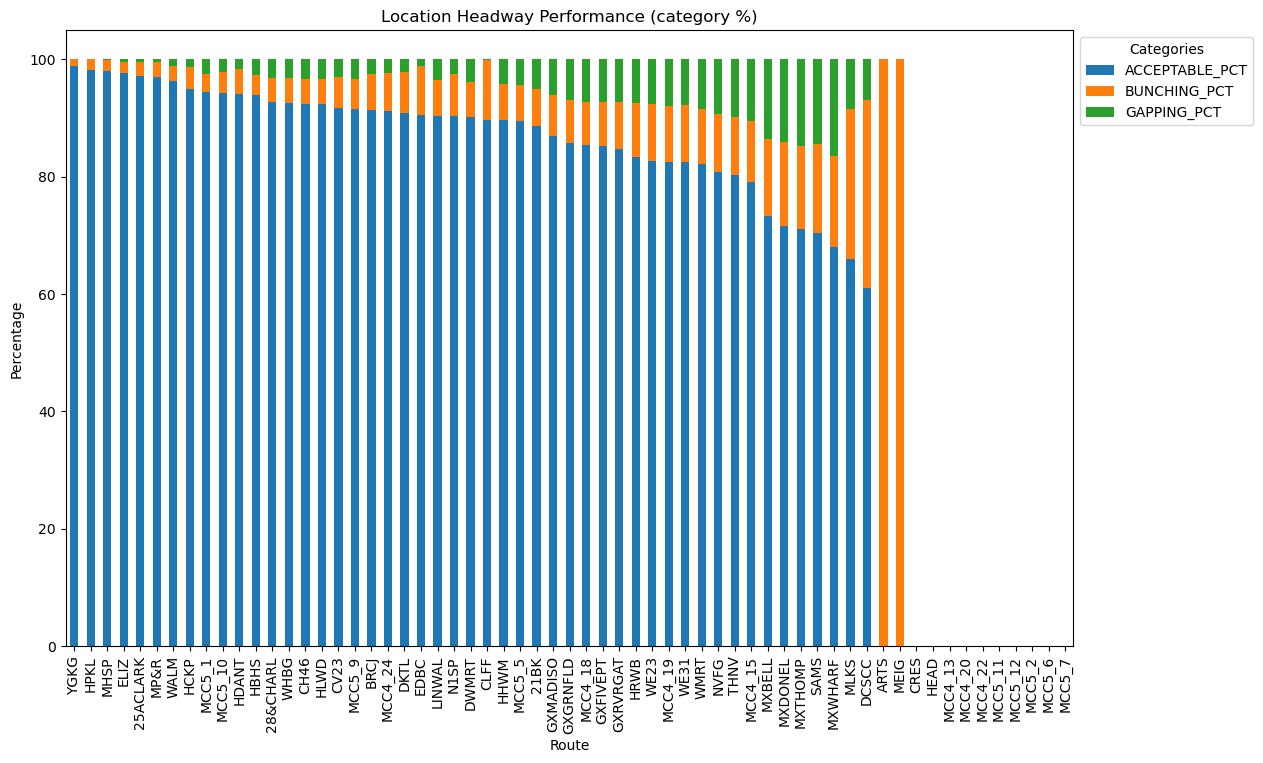

In [91]:
# Location Adherence graph
ax = (hdwy_location_totals[['ACCEPTABLE_PCT', 'BUNCHING_PCT', 'GAPPING_PCT']]
            ).sort_values('ACCEPTABLE_PCT', ascending=False).plot(kind='bar', stacked=True, figsize=(13, 8))
    
ax.set(title = 'Location Headway Performance (category %)',
        xlabel = 'Route',
       ylabel = 'Percentage')
ax.legend(bbox_to_anchor=(1, 1), title='Categories')
# ax.tick_params(axis='x', rotation=0)

# Q3
How does time of day or day of week affect headway and on-time performance?

In [92]:
#create HDWY_DEV PERCENTAGE COLUMN 
wego['HDWY_DEV_PCT'] = wego['HDWY_DEV']/wego['SCHEDULED_HDWY']*100

In [93]:
#create hour and day of week column
wego['ACTUAL_ARRIVAL_TIME'] = pd.to_datetime(wego['ACTUAL_ARRIVAL_TIME'])
wego['HOUR'] = wego['ACTUAL_ARRIVAL_TIME'].dt.hour
wego['DAY_OF_WEEK'] = wego['ACTUAL_ARRIVAL_TIME'].dt.day_name()

In [94]:
# create weekday column
wego['WEEKDAY'] = pd.to_datetime(wego['DATE']).dt.weekday

In [95]:
 #creat time column
# clean_departure_time['DEPART_TIME'] = pd.to_datetime(wego['ACTUAL_DEPARTURE_TIME'],format = 'mixed')
#  wego['DEPART_TIME'] = wego['DEPART_TIME'].dt.strftime('%H:%M:%S')

In [96]:
 #wego.dtypes

In [97]:
 wego['DATE']=pd.to_datetime(wego['DATE'])

In [98]:
# wego.dtypes

In [99]:
clean_departure_time = wego.dropna(subset=['ACTUAL_DEPARTURE_TIME'])

In [100]:
clean_departure_time

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,DATE_TRIP,HDWY_DEV_PCT,HDWY_BUNCHING,HDWY_GAPPING,HDWY_ACCEPTABLE,HOUR,DAY_OF_WEEK,WEEKDAY
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,6.500000,NaN,120230801-345104,NaN,0,0,0,4.0,Tuesday,1
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0.000000,NaN,120230801-345104,NaN,0,0,0,4.0,Tuesday,1
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0.000000,NaN,120230801-345104,NaN,0,0,0,4.0,Tuesday,1
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0.000000,NaN,120230801-345104,NaN,0,0,0,5.0,Tuesday,1
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,12.866666,5.0,120230801-345105,NaN,0,0,0,5.0,Tuesday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350324,120230930,2,100406610,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,0.000000,NaN,120230930-353448,17.555553,0,0,1,22.0,Saturday,5
350325,120230930,2,100406611,2023-09-30,7,702,2312,353448,0,TO DOWNTOWN,...,0.000000,NaN,120230930-353448,NaN,0,0,0,22.0,Saturday,5
350326,120230930,2,100406612,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,0.000000,NaN,120230930-353449,6.222220,0,0,1,22.0,Saturday,5
350327,120230930,2,100406613,2023-09-30,7,702,2312,353449,0,FROM DOWNTOWN,...,0.000000,NaN,120230930-353449,58.333333,1,0,0,23.0,Saturday,5


In [101]:
#clean_departure_time.groupby('HOUR')[['ADHERENCE', 'HDWY_DEV']].mean()

#Adherence by hour

In [102]:
# Create new df for Adherence columns grouped by Hour
total_hours =clean_departure_time.groupby('HOUR')[['ADJUSTED_ONTIME_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_EARLY_COUNT']].sum()


In [103]:
# Create new total column for each row
total_hours['TOTALS'] = total_hours.sum(axis=1)

In [104]:
total_hours['TOTALS']

HOUR
0.0      4237
1.0       191
3.0       130
4.0      2074
5.0     10455
6.0     18925
7.0     21292
8.0     21011
9.0     20362
10.0    20332
11.0    19684
12.0    20015
13.0    20151
14.0    20442
15.0    21281
16.0    21682
17.0    21017
18.0    17564
19.0    13550
20.0    12454
21.0    11860
22.0    11097
23.0     9052
Name: TOTALS, dtype: int64

In [105]:
# Create new percentage column for each category
total_hours.loc[:, 'ONTIME_PCT'] = total_hours['ADJUSTED_ONTIME_COUNT'] / total_hours['TOTALS'] * 100
total_hours.loc[:, 'EARLY_PCT'] = total_hours['ADJUSTED_EARLY_COUNT'] / total_hours['TOTALS'] * 100
total_hours.loc[:, 'LATE_PCT'] = total_hours['ADJUSTED_LATE_COUNT'] / total_hours['TOTALS'] * 100

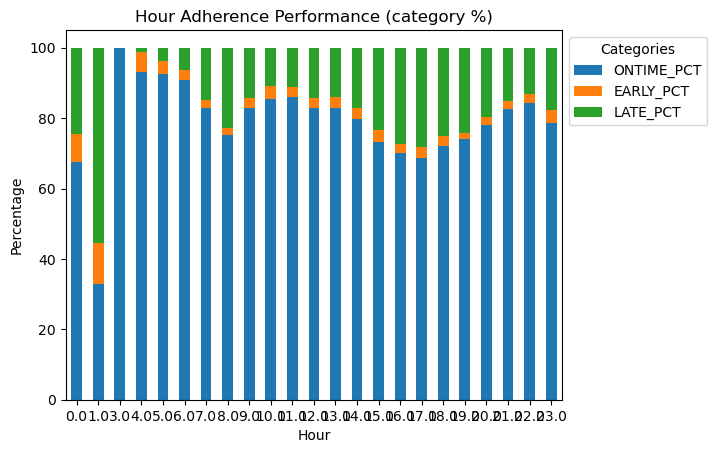

In [106]:
# Hour Adherence graph
ax = (total_hours[['ONTIME_PCT', 'EARLY_PCT', 'LATE_PCT']]
).plot(kind='bar', stacked=True)
ax.set(title = 'Hour Adherence Performance (category %)',
        xlabel = 'Hour',
       ylabel = 'Percentage')
ax.legend(bbox_to_anchor=(1, 1), title='Categories')
ax.tick_params(axis='x', rotation=0)

#Headway by hour

In [107]:
hdwy_hours = clean_departure_time.groupby('HOUR')[['HDWY_BUNCHING', 'HDWY_ACCEPTABLE', 'HDWY_GAPPING']].sum()


In [108]:
hdwy_hours

,HDWY_BUNCHING,HDWY_ACCEPTABLE,HDWY_GAPPING
HOUR,,,
0.0,184,2545,191
1.0,20,44,10
3.0,0,0,0
4.0,3,602,8
5.0,177,6082,104
6.0,811,13695,566
7.0,1482,14228,1005
8.0,1640,13547,1569
9.0,1201,13958,1168


In [109]:
# Create new total column for each row
hdwy_hours['TOTALS'] = hdwy_hours.sum(axis=1)

In [110]:
# Create new percentage column for each category
hdwy_hours.loc[:, 'BUNCHING_PCT'] = hdwy_hours['HDWY_BUNCHING'] / hdwy_hours['TOTALS'] * 100
hdwy_hours.loc[:, 'ACCEPTABLE_PCT'] =hdwy_hours['HDWY_ACCEPTABLE'] / hdwy_hours['TOTALS'] * 100
hdwy_hours.loc[:, 'GAPPING_PCT'] = hdwy_hours['HDWY_GAPPING'] / hdwy_hours['TOTALS'] * 100

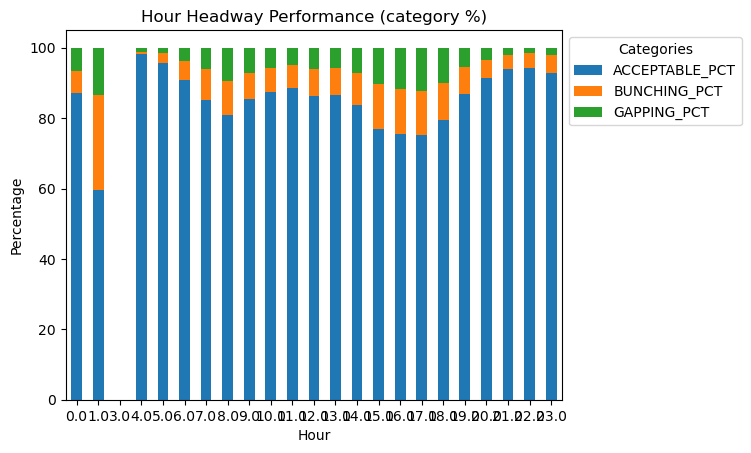

In [111]:
# Hour Headway graph
ax = (hdwy_hours[['ACCEPTABLE_PCT', 'BUNCHING_PCT', 'GAPPING_PCT']]
).plot(kind='bar', stacked=True)
ax.set(title = 'Hour Headway Performance (category %)',
        xlabel = 'Hour',
       ylabel = 'Percentage')
ax.legend(bbox_to_anchor=(1, 1), title='Categories')
ax.tick_params(axis='x', rotation=0)

#Adherence by weekday

In [112]:
# # # Convert depart time column to datetime
# clean_departure_time['DEPART_TIME'] = ([pd.to_datetime('2000-01-01 ' + str(t), format='mixed')
#                                    for t in clean_departure_time['TIME']])

In [113]:
# # Create Weekday column
# clean_dept_time['WEEKDAY'] = pd.to_datetime(clean_dept_time['DATE']).dt.weekday

In [114]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES', 'DATE_TRIP', 'HDWY_DEV_PCT',
       'HDWY_BUNCHING', 'HDWY_GAPPING', 'HDWY_ACCEPTABLE', 'HOUR',
       'DAY_OF_WEEK', 'WEEKDAY'],
      dtype='object')

In [115]:
wego.head()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,...,DWELL_IN_MINS,SCHEDULED_LAYOVER_MINUTES,DATE_TRIP,HDWY_DEV_PCT,HDWY_BUNCHING,HDWY_GAPPING,HDWY_ACCEPTABLE,HOUR,DAY_OF_WEEK,WEEKDAY
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,6.500000,NaN,120230801-345104,NaN,0,0,0,4.0,Tuesday,1
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0.000000,NaN,120230801-345104,NaN,0,0,0,4.0,Tuesday,1
2,120230801,1,99457892,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0.000000,NaN,120230801-345104,NaN,0,0,0,4.0,Tuesday,1
3,120230801,1,99457893,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,...,0.000000,NaN,120230801-345104,NaN,0,0,0,5.0,Tuesday,1
4,120230801,1,99457894,2023-08-01,22,2200,1040,345105,0,FROM DOWNTOWN,...,12.866666,5.0,120230801-345105,NaN,0,0,0,5.0,Tuesday,1


In [116]:
# use Grouper to group by Weekday
wego_by_day =   clean_departure_time.groupby(pd.Grouper(key='WEEKDAY'))

In [117]:
wego_by_day

In [118]:
# Create new df for Adherence columns grouped by Weekday
weekday_totals = wego_by_day [['ADJUSTED_ONTIME_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_EARLY_COUNT']].sum()

In [119]:
# Create new total column for each row
weekday_totals['TOTALS'] = weekday_totals.sum(axis=1)

In [120]:
weekday_totals['TOTALS']

WEEKDAY
1    56774
2    56941
3    56267
4    55914
5    36530
6    28446
0    47989
Name: TOTALS, dtype: int64

In [121]:
# Create new percentage column for each category
# weekday_totals.loc[:, 'ONTIME_PCT'] = weekday_totals['ADJUSTED_ONTIME_COUNT'] / weekday_totals['TOTALS'] * 100
# weekday_totals.loc[:, 'EARLY_PCT'] = weekday_totals['ADJUSTED_EARLY_COUNT'] / weekday_totals['TOTALS'] * 100
# weekday_totals.loc[:, 'LATE_PCT'] = weekday_totals['ADJUSTED_LATE_COUNT'] / weekday_totals['TOTALS'] * 100

In [122]:
weekday_totals['ONTIME_PCT'] = (weekday_totals['ADJUSTED_ONTIME_COUNT'] / weekday_totals['TOTALS']) * 100
weekday_totals['EARLY_PCT'] = (weekday_totals['ADJUSTED_EARLY_COUNT'] / weekday_totals['TOTALS']) * 100
weekday_totals['LATE_PCT'] = (weekday_totals['ADJUSTED_LATE_COUNT'] / weekday_totals['TOTALS']) * 100

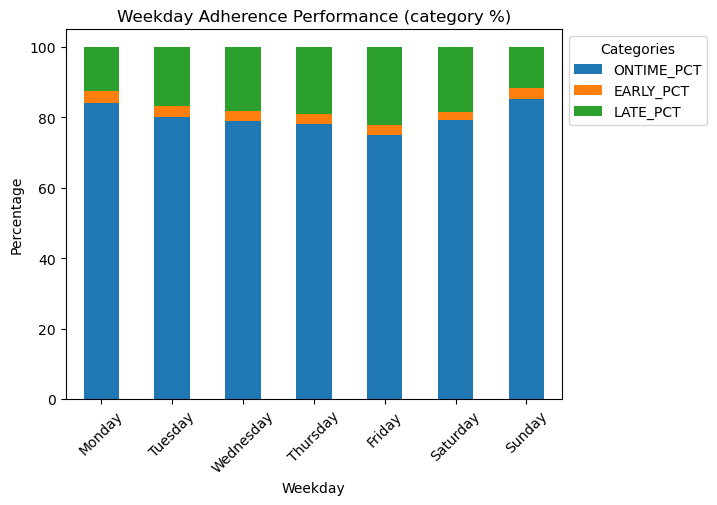

In [123]:
# Hour Adherence graph
ax = (weekday_totals[['ONTIME_PCT', 'EARLY_PCT', 'LATE_PCT']]
                ).sort_index().plot(kind='bar', stacked=True)

ax.set(title = 'Weekday Adherence Performance (category %)',
        xlabel = 'Weekday',
       ylabel = 'Percentage')
ax.legend(bbox_to_anchor=(1, 1), title='Categories')
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax.tick_params(axis='x', rotation=45)

#Headway by weekday

In [124]:
# Create new df for Headway columns grouped by Weekday
hdwy_weekday_totals = (
    wego_by_day
         [['HDWY_BUNCHING', 'HDWY_ACCEPTABLE', 'HDWY_GAPPING']]
         .sum())

In [125]:
hdwy_weekday_totals['TOTALS'] = hdwy_weekday_totals.sum(axis=1)

In [126]:
# Create new percentage column for each category
hdwy_weekday_totals['BUNCHING_PCT'] = hdwy_weekday_totals['HDWY_BUNCHING'] / hdwy_weekday_totals['TOTALS'] * 100
hdwy_weekday_totals['ACCEPTABLE_PCT'] = hdwy_weekday_totals['HDWY_ACCEPTABLE'] /hdwy_weekday_totals['TOTALS'] * 100
hdwy_weekday_totals['GAPPING_PCT'] = hdwy_weekday_totals['HDWY_GAPPING'] / hdwy_weekday_totals['TOTALS'] * 100

In [127]:
hdwy_weekday_totals

,HDWY_BUNCHING,HDWY_ACCEPTABLE,HDWY_GAPPING,TOTALS,BUNCHING_PCT,ACCEPTABLE_PCT,GAPPING_PCT
WEEKDAY,,,,,,,
1,3825,37530,3239,44594,8.577387,84.159304,7.263309
2,3955,37301,3444,44700,8.847875,83.447427,7.704698
3,4290,36404,3525,44219,9.701712,82.326602,7.971686
4,4911,35014,4028,43953,11.173299,79.662367,9.164335
5,1397,26108,1039,28544,4.894198,91.465807,3.639994
6,1015,20686,483,22184,4.575370,93.247386,2.177245
0,2580,32875,2241,37696,6.844228,87.210845,5.944928


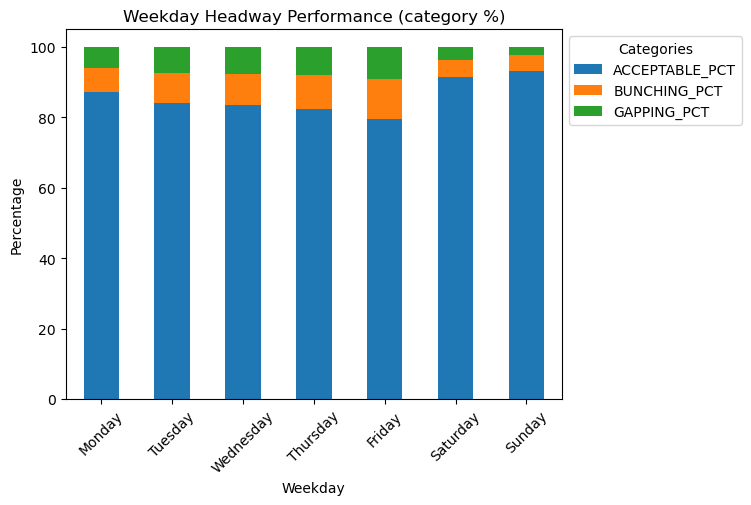

In [182]:
# Hour Adherence graph
ax = (hdwy_weekday_totals[['ACCEPTABLE_PCT', 'BUNCHING_PCT', 'GAPPING_PCT']]
                ).sort_index().plot(kind='bar', stacked=True)

ax.set(title = 'Weekday Headway Performance (category %)',
        xlabel = 'Weekday',
       ylabel = 'Percentage')
ax.legend(bbox_to_anchor=(1, 1), title='Categories')
ax.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
ax.tick_params(axis='x', rotation=45)

#NO TRIPS WERE MADE DURING THE HOURS OF 2 AND 3

In [129]:
wego['HDWY_DEV']

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
            ...    
350324     5.266666
350325          NaN
350326     1.866666
350327    17.500000
350328          NaN
Name: HDWY_DEV, Length: 350329, dtype: float64

# Q3
How does time of day or day of week affect headway and on-time performance?

In [130]:
#wego.head()

In [131]:
wego['WEEK_DAY'] = wego['DATE'].dt.day_name()

In [132]:
#wego.head()

In [133]:
wego['TIME_POINT_ABBR'].nunique()

61

In [134]:
#headway deviation by hour
#HOURLY_HDWY_DEVIATION = wego.groupby('HOUR')['HDWY_DEV_PCT'].describe()


In [135]:
#HOURLY_HDWY_DEVIATION

In [136]:
# wego['HDWY_DEV_PCT'].dropna()

In [137]:
#headway deviation by day of week
# DAILY_HDWY_DEVIATION = wego.groupby('DAY_OF_WEEK')['HDWY_DEV_PCT'].describe().reset_index()

In [138]:
# DAILY_HDWY_DEVIATION

In [139]:
# DAILY_HDWY_DEVIATION.boxplot(column = 'HDWY_DEV_PCT', by = 'HOUR')
# plt.xlabel('HOUR')
# plt.ylabel('HDWY_DEV_PCT')
# plt.xticks(rotation = 90)
# plt.title('Headway Deviation Percentage by Hour')

# plt.show()

# HOURLY_HDWY_DEVIATION['count'].plot(kind='line', title='Headway Deviation by Time of Day')
# plt.show()

In [140]:
#  headway deviation by day of week
#daily_hdwy_deviation = wego.groupby('DAY_OF_WEEK')['HDWY_DEV_PCT'].describe().reset_index()

# DAILY_HDWY_DEVIATION.boxplot(column = 'mean', by='DAY_OF_WEEK')
# plt.title('Mean Headway Deviation Percentage by Day of Week')
# plt.xlabel('DAY_OF_WEEK')
# plt.ylabel('Mean Headway Deviation Percentage')
# plt.xticks(rotation=45)
# plt.show()

# DAILY_HDWY_DEVIATION['count'].plot(kind='bar', title='Headway Deviation by Day of Week', x='DAY_OF_WEEK')

# plt.show()

In [141]:
# # Hourly Adherence
# wego.groupby('HOUR')[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']].sum()


In [142]:
# Dalily Adherence 
#Daily_adherence = wego.groupby('DAY_OF_WEEK')[['ADJUSTED_EARLY_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT']].sum().reset_index()

In [143]:
#Daily_adherence

# Q4
How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the OPERATOR variable.

#create a new dataframe for Adherance

In [144]:
wego.groupby('OPERATOR')[['HDWY_DEV','ADHERENCE']].mean()


,HDWY_DEV,ADHERENCE
OPERATOR,,
0,NaN,8.916666
56,-0.250000,-1.138889
235,1.918518,-3.947222
244,-0.037500,-3.466666
301,2.832222,-4.971171
...,...,...
3149,1.434226,-0.993939
3156,0.759347,-4.489942
3165,5.553472,-7.501562


Adherence by operator

In [197]:
# Create new df for Adherence columns grouped by OPERATOR
operator_adherence_total = wego.groupby('OPERATOR')[['ADJUSTED_ONTIME_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_EARLY_COUNT']].sum()


In [271]:
#create a new adherence total column
operator_adherence_total['ADHER_TOTAL'] = operator_adherence_total[['ADJUSTED_ONTIME_COUNT', 'ADJUSTED_LATE_COUNT', 'ADJUSTED_EARLY_COUNT']].sum(axis=1)

In [272]:
# Create new percentage column for each category
operator_adherence_total['ONTIME_PCT'] = operator_adherence_total['ADJUSTED_ONTIME_COUNT'] / operator_adherence_total['ADHER_TOTAL'] * 100
operator_adherence_total['EARLY_PCT'] = operator_adherence_total['ADJUSTED_EARLY_COUNT'] / operator_adherence_total['ADHER_TOTAL'] * 100
operator_adherence_total['LATE_PCT'] =operator_adherence_total['ADJUSTED_LATE_COUNT'] / operator_adherence_total['ADHER_TOTAL'] * 100

creat the top 20 operator

In [273]:
top_20_adhe = operator_adherence_total.loc[operator_adherence_total['ADHER_TOTAL']>=1000].nlargest(20,'ONTIME_PCT')

In [274]:
#top_20_adhe

In [275]:
# Operator Adherence graph
#operator_adherence_total.boxplot(column=['ONTIME_PCT', 'EARLY_PCT', 'LATE_PCT']) 

Headway by Operator

In [276]:
# create a new column for Hedway grouped by operator
hdwy_operator_total = wego.groupby('OPERATOR') [['HDWY_BUNCHING', 'HDWY_ACCEPTABLE', 'HDWY_GAPPING']].sum()

In [277]:
hdwy_operator_total.head()

,HDWY_BUNCHING,HDWY_ACCEPTABLE,HDWY_GAPPING
OPERATOR,,,
0,0,0,0
56,0,2,0
235,2,7,0
244,4,13,3
301,10,16,4


In [281]:
#create a new hdwy total column
hdwy_operator_total['HDWY_TOTAL'] = hdwy_operator_total[['HDWY_BUNCHING', 'HDWY_ACCEPTABLE', 'HDWY_GAPPING']].sum(axis=1)

In [282]:
#create a new percentage column
hdwy_operator_total['BUNCHING_PCT'] =  hdwy_operator_total['HDWY_BUNCHING']/hdwy_operator_total['HDWY_TOTAL']*100
hdwy_operator_total['ACCEPTABLE_PCT'] =  hdwy_operator_total['HDWY_ACCEPTABLE']/hdwy_operator_total['HDWY_TOTAL']*100
hdwy_operator_total['GAPPING_PCT'] =  hdwy_operator_total['HDWY_GAPPING']/hdwy_operator_total['HDWY_TOTAL']*100

In [283]:
top_20_hdwy =hdwy_operator_total.loc[hdwy_operator_total['HDWY_TOTAL']>=1000].nlargest(20,'ACCEPTABLE_PCT')

In [293]:
#top_20_hdwy

In [285]:
top_operators = pd.merge(top_20_adhe[['ADHER_TOTAL','ONTIME_PCT']],top_20_hdwy[['HDWY_TOTAL','ACCEPTABLE_PCT']],how = 'inner',left_index=True,right_index = True)

In [294]:
#top_operators

bottom 20 operator

In [287]:
bottom_20_adhe = operator_adherence_total.nsmallest(20,'ONTIME_PCT')

In [288]:
#bottom_20_adhe

In [295]:
bottom_20_hdwy = bottom_20_hdwy =hdwy_operator_total.loc[hdwy_operator_total['HDWY_TOTAL']>=1000].nsmallest(20,'ACCEPTABLE_PCT')

In [292]:
#bottom_20_hdwy

In [256]:
bottom_operators = pd.merge(bottom_20_adhe[['ADHER_TOTAL','ONTIME_PCT']],bottom_20_hdwy[['HDWY_TOTAL','ACCEPTABLE_PCT']],how = 'inner',left_index=True,right_index = True)

In [297]:
bottom_operators

,ADHER_TOTAL,ONTIME_PCT,HDWY_TOTAL,ACCEPTABLE_PCT
OPERATOR,,,,
2792,1,100500.0,1,102200.0
2082,1,102800.0,1,103400.0
2765,1,106900.0,1,106500.0
2371,1,112400.0,1,105200.0


In [298]:
top_bottom_operators = pd.concat([top_operators,bottom_operators])

In [299]:
top_bottom_operators 

,ADHER_TOTAL,ONTIME_PCT,HDWY_TOTAL,ACCEPTABLE_PCT
OPERATOR,,,,
1762,2333,98.328333,1553,91.435930
409,2380,97.058824,1715,96.618076
1566,2200,97.045455,1835,98.038147
1927,2413,96.021550,1960,95.357143
1040,1770,95.762712,1058,97.353497
1133,2625,95.428571,2177,93.615067
1617,1806,95.293466,1281,97.189696
2321,1420,94.014085,1180,93.728814
2041,1548,92.829457,1187,93.344566


In [300]:
top_bottom_operators  = top_bottom_operators.sort_values('ONTIME_PCT',ascending = False)

In [301]:
top_bottom_operators 

,ADHER_TOTAL,ONTIME_PCT,HDWY_TOTAL,ACCEPTABLE_PCT
OPERATOR,,,,
2371,1,112400.000000,1,105200.000000
2765,1,106900.000000,1,106500.000000
2082,1,102800.000000,1,103400.000000
2792,1,100500.000000,1,102200.000000
1762,2333,98.328333,1553,91.435930
409,2380,97.058824,1715,96.618076
1566,2200,97.045455,1835,98.038147
1927,2413,96.021550,1960,95.357143
1040,1770,95.762712,1058,97.353497


creat a graph for top and bottom operators 

In [209]:
# plt.figure(figsize=(8, 6))
# hdwy_operator_total.boxplot(column = ['BUNCHING_PCT','ACCEPTABLE_PCT','GAPPING_PCT'])
# plt.title('Headway Deviation Percentage by Driver')

# plt.show()

# Q5
Is there any relationship between lateness (ADHERENCE) and headway deviation?

In [151]:
wego.columns

Index(['CALENDAR_ID', 'SERVICE_ABBR', 'ADHERENCE_ID', 'DATE', 'ROUTE_ABBR',
       'BLOCK_ABBR', 'OPERATOR', 'TRIP_ID', 'OVERLOAD_ID',
       'ROUTE_DIRECTION_NAME', 'TIME_POINT_ABBR', 'ROUTE_STOP_SEQUENCE',
       'TRIP_EDGE', 'LATITUDE', 'LONGITUDE', 'SCHEDULED_TIME',
       'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME', 'ADHERENCE',
       'SCHEDULED_HDWY', 'ACTUAL_HDWY', 'HDWY_DEV', 'ADJUSTED_EARLY_COUNT',
       'ADJUSTED_LATE_COUNT', 'ADJUSTED_ONTIME_COUNT', 'STOP_CANCELLED',
       'PREV_SCHED_STOP_CANCELLED', 'IS_RELIEF', 'DWELL_IN_MINS',
       'SCHEDULED_LAYOVER_MINUTES', 'DATE_TRIP', 'HDWY_DEV_PCT',
       'HDWY_BUNCHING', 'HDWY_GAPPING', 'HDWY_ACCEPTABLE', 'HOUR',
       'DAY_OF_WEEK', 'WEEKDAY', 'WEEK_DAY'],
      dtype='object')

In [165]:
#create a new dataframe for adherence and hdwy_dev
adh_hdwy_dev = wego[['ADHERENCE','ADJUSTED_ONTIME_COUNT','ADJUSTED_EARLY_COUNT','ADJUSTED_LATE_COUNT','HDWY_DEV']]

In [166]:
adh_hdwy_dev

,ADHERENCE,ADJUSTED_ONTIME_COUNT,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,HDWY_DEV
0,-2.133333,1,0,0,NaN
1,-2.450000,1,0,0,NaN
2,-0.933333,1,0,0,NaN
3,6.283333,1,0,0,NaN
4,-1.583333,1,0,0,NaN
...,...,...,...,...,...
350324,-8.433333,0,0,1,5.266666
350325,-11.300000,0,0,1,NaN
350326,-4.316666,1,0,0,1.866666
350327,-22.083333,0,0,1,17.500000


In [264]:
adh_hdwy_corr = wego[['ADHERENCE','HDWY_DEV']].dropna().reset_index()

In [265]:
adh_hdwy_corr

,index,ADHERENCE,HDWY_DEV
0,7,-1.716666,2.666666
1,8,-1.916666,1.966666
2,9,-0.183333,-0.483334
3,11,-1.316666,-2.166667
4,12,1.500000,-3.883334
...,...,...,...
265888,350320,-5.900000,6.716666
265889,350323,-8.616666,4.916666
265890,350324,-8.433333,5.266666
265891,350326,-4.316666,1.866666


In [266]:
adh_late_hdw_corr =wego[['ADJUSTED_LATE_COUNT','HDWY_DEV']].corr()

In [159]:
adh_late_hdw_corr

,ADJUSTED_LATE_COUNT,HDWY_DEV
ADJUSTED_LATE_COUNT,1.000000,0.256087
HDWY_DEV,0.256087,1.000000


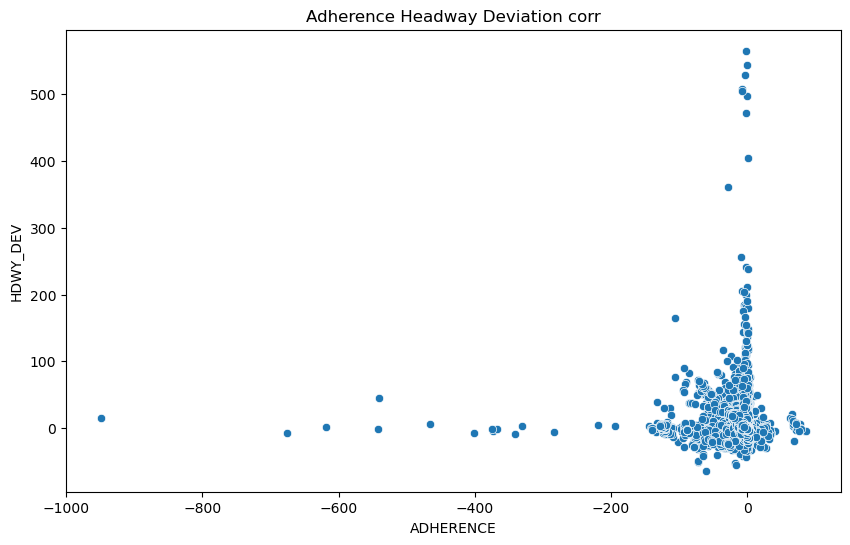

In [268]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=adh_hdwy_dev, x='ADHERENCE', y='HDWY_DEV')
plt.title('Adherence Headway Deviation corr')
plt.show()

#it indicateds that as the number of late counts incresases, the headway deviation tends to increase slightly. 

In [ ]:
# # compute slope m and intercept b
# m, b = np.polyfit(x, y, deg=1)

# # plot fitted y = m*x + b
# plt.axline(xy1=(0, b), slope=m, color='r', label=f'$y = {m:.2f}x {b:+.2f}$')